In [1]:
from collections import defaultdict
import random

from tqdm.notebook import tqdm

import pandas as pd
from collections import Counter

from scipy import sparse
from scipy.sparse.linalg import svds
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize

import glob
import re
import matplotlib.pyplot as plt

import math

In [2]:
def full_book_dictionary(book_folder_name):
    glob_name = book_folder_name + '/*'
    books_in_folder = glob.glob(glob_name)
    book_path = book_folder_name + '\\'
    
    dict_name = {}
    all_book = ""
    book_name_start = len(book_path)
    
    for b in books_in_folder:
        book = b[book_name_start:]
        with open(book_path+book,encoding="utf8") as fi:
            book_r = fi.read()
        c_book = book_r.replace('\n', ' ')
        book_name = book[:-4]
        dict_name[book_name] = c_book
    return dict_name

In [61]:
def full_common_df(max_word_count, book_dictionary):
    column_name_list = list((range(1, 10000 + 1)))
    
    log_name_list = []
    for r in column_name_list:
        log_name_list.append(math.log(r))
    
    column_name = ['rank_log']
    cmn_word_df = pd.DataFrame(columns=column_name)
    cmn_word_df.loc[:,0] = log_name_list
    
    count = 0
    book_index = []
    for b in book_dictionary:
        word_rank = 0 
        false_word = ['s','t','n','5','10','15','20']
        ind = []
        fre = []
        fretwo = []
        book_df_header = [b]
        single_book_df = pd.DataFrame(columns=book_df_header)
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_dictionary[b], '\w+')]
        if len(book_token_words) > 0:
            book_index.append(b)
            book_token_counter = Counter(book_token_words).most_common()
            total_words = len(book_token_counter)
            max_fre = 0
            for item in book_token_counter:
                if item[0] not in false_word:
                    if word_rank < total_words:
                        ind.append(item[0])
                        fre.append(item[1])
                        fretwo.append(math.log(item[1]))
                        if (item[1]*run) > max_fre:
                            max_fre = item[1]*run
                        run = run + 1
                        word_rank = word_rank + 1
            single_book_df.loc[:,count+1] = fretwo
            cmn_word_df = pd.concat([cmn_word_df,single_book_df], ignore_index=True, axis=1)
            #cmn_word_df.loc[:,count+1] = fretwo
            count = count + 1
            print(b)
            print(book_token_counter)
            print(len(book_token_counter))
    return(cmn_word_df)

In [68]:
def pfit_slope(fit_df):
    form_fit_df = fit_df.apply(pd.to_numeric)
    count = 0
    for col in fit_df.columns:
        print(fit_df[col].count())
        if count != 0:
            theta = np.polyfit(form_fit_df.loc[:,0], form_fit_df.loc[count,:], 1)
            print("{} slope".format(theta[0]))
        count = count + 1

In [69]:
manuscript_book_d = full_book_dictionary('manuscript_text')
manuscript_df = full_common_df(200, manuscript_book_d)
pfit_slope(manuscript_df)
manuscript_df.head()

voynich_script
[('8am', 969), ('tc8g', 498), ('oe', 439), ('4odam', 431), ('sc8g', 426), ('am', 404), ('toe', 393), ('s', 374), ('tcg', 342), ('currier', 324), ('m', 322), ('a', 320), ('4odcc8g', 302), ('8ar', 297), ('or', 293), ('4odccg', 281), ('ar', 279), ('odam', 276), ('scg', 273), ('4odc8g', 267), ('n', 258), ('2', 257), ('8ae', 257), ('hand', 236), ('8g', 235), ('2am', 225), ('o', 221), ('tor', 213), ('line', 209), ('ends', 207), ('folio', 206), ('page', 205), ('oham', 195), ('language', 193), ('ae', 193), ('4odae', 188), ('soe', 183), ('g', 176), ('r', 174), ('4oe', 170), ('tccg', 165), ('tcoe', 157), ('odccg', 148), ('4odar', 145), ('tg', 143), ('4odg', 143), ('t8g', 142), ('tdzg', 138), ('transcription', 135), ('ohc8g', 135), ('from', 133), ('sccg', 132), ('added', 131), ('dam', 130), ('ohae', 128), ('c', 128), ('odae', 127), ('herbal', 124), ('ohar', 124), ('so', 120), ('4oham', 120), ('ram', 119), ('hzg', 115), ('etc8g', 115), ('odar', 113), ('4odcg', 109), ('odc8g', 108), 

TypeError: expected x and y to have same length

In [44]:
book_folder_name = 'manuscript_text'
glob_name = book_folder_name + '/*'
books_in_folder = glob.glob(glob_name)
book_path = book_folder_name + '\\'

dict_name = {}
all_book = ""
book_name_start = len(book_path)

for b in books_in_folder:
    book = b[book_name_start:]
    with open(book_path+book,encoding="utf8") as fi:
        book_r = fi.read()
    c_book = re.sub(r'\#[^\n]+\n', '',book_r)
    #c_book = re.sub(r'\#', '',book_r)
    #c_book_repalced = c_book.replace(r',', ' ')
    book_name = book[:-4]
    dict_name[book_name] = c_book

In [45]:
dict_name

{'voynich_script': '#\n#\n#\n#\n#\n#\n#\n#\n\x0c\n#\nFGAG2,GDAE,AR,GHAM,SOE,SORG,0D0RC2,GDOR,SOE8G-\n2ORG,DZAR,ORG,DAIR,THAM,SOR,AR,HZAR,HZAR,8ALA-\n2GAIIR,SCDG,OR,GDAM,SO8,HZOARG,HZC2,8ARAM,2G-\n0OM,OHCCG,OHCAR,ROEOHG,HZAAR,8AM,ODAM,OR,ODAL-\n2AIRG,TCAR,HZAM,PZAR,FZAM=\nG8ARAISG=\nO8AR,SG,SOE,PZOG,OG8AR,S,2,FZOAM,SO8ARG-\nGSCG,SO8G,ODTO,G,OHTOE,TOHZG,O2TG,8AN,TOR,DO2-\n8AM,SOR,FZOE,SO8G=\n8AN,02,HCO8G=\nG8AN,PZC2AM,OE2,PZCG,GHAN,SOSG,PZO8AEC2-\nODSO,DSOG,OHAIRN,OHCOE,ODAL,SO8AN,2DZCG,8AM-\nSOG,DZCG,DO8AM,PZG,PZ08AIIE2,HZCG,SC,OE8AN,8-\n8AN,OM,TOE,O8AM,TO8AN,T8G,ODON,80R,HZG,DO8-\n8AM,SDZCG,DZOR,TOR,SCG,DOE,TOE,TOE,DOR,TOE-\nSO,TOE,SO8AL,DSG,DTG,8OR,TO8AM,SO,DOCAK-\nGTO,HTCG,TCDAN,SCO,PSOE,8G8G8,HZG,8AIHZG-\nGHO,SOE,SC,DO8SCG,PZCAEG,8ARAN,8AN,DZG82-\n8TAR,SHZAM,ODAIIR,TCG,2TG,PZHOE,HZOE2,8AOCHA-\nSOD,TOR,TCG,8AN,DZCG=\nOHOE,8AIM=\nPZO,SAM,SODTCCG,TOE,HSO8CC2G,SCG,PG8CCG,TG,RO8-\n00ON,TOE,8AN,HZAE,8AR,SCAR,DAM,8AR,SCG,HZCAR-\nCTO00,DAM,SOAM,ODOE,8AM,FAR,HZOE,8AM,HZOE8AR-\nGTCCG,ODCCG,OD

In [46]:
manuscript_df = full_common_df(200, dict_name)
pfit_slope(manuscript_df)
manuscript_df.head()

voynich_script
[('8am', 969), ('tc8g', 498), ('oe', 439), ('4odam', 431), ('sc8g', 426), ('am', 404), ('toe', 393), ('tcg', 342), ('m', 322), ('4odcc8g', 302), ('8ar', 297), ('or', 293), ('4odccg', 281), ('ar', 277), ('odam', 276), ('scg', 273), ('4odc8g', 267), ('n', 258), ('8ae', 257), ('8g', 235), ('2am', 225), ('o', 220), ('tor', 213), ('2', 211), ('a', 202), ('oham', 195), ('ae', 193), ('4odae', 188), ('soe', 183), ('g', 176), ('4oe', 170), ('r', 168), ('tccg', 165), ('tcoe', 157), ('odccg', 148), ('4odar', 145), ('tg', 143), ('4odg', 143), ('t8g', 142), ('tdzg', 138), ('ohc8g', 135), ('sccg', 132), ('dam', 130), ('ohae', 128), ('c', 128), ('odae', 127), ('ohar', 124), ('4oham', 120), ('so', 119), ('ram', 119), ('hzg', 115), ('etc8g', 115), ('odar', 113), ('4odcg', 109), ('odc8g', 108), ('8oe', 105), ('scoe', 104), ('sg', 103), ('odcc8g', 102), ('8air', 99), ('ohg', 97), ('e', 97), ('ohccg', 96), ('4ohc8g', 96), ('sor', 93), ('8ak', 93), ('8an', 91), ('t', 89), ('2oe', 85), ('odg'

-0.9588743425213218 slope


,1,2,3,4,5,6,7,8,9,10,...,6720,6721,6722,6723,6724,6725,6726,6727,6728,6729
0,0.0,0.693147,1.098612,1.386294,1.609438,1.791759,1.94591,2.079442,2.197225,2.302585,...,8.812843,8.812992,8.813141,8.81329,8.813438,8.813587,8.813736,8.813885,8.814033,8.814182
1,6.876265,6.2106,6.084499,6.066108,6.054439,6.001415,5.97381,5.834811,5.774552,5.710427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


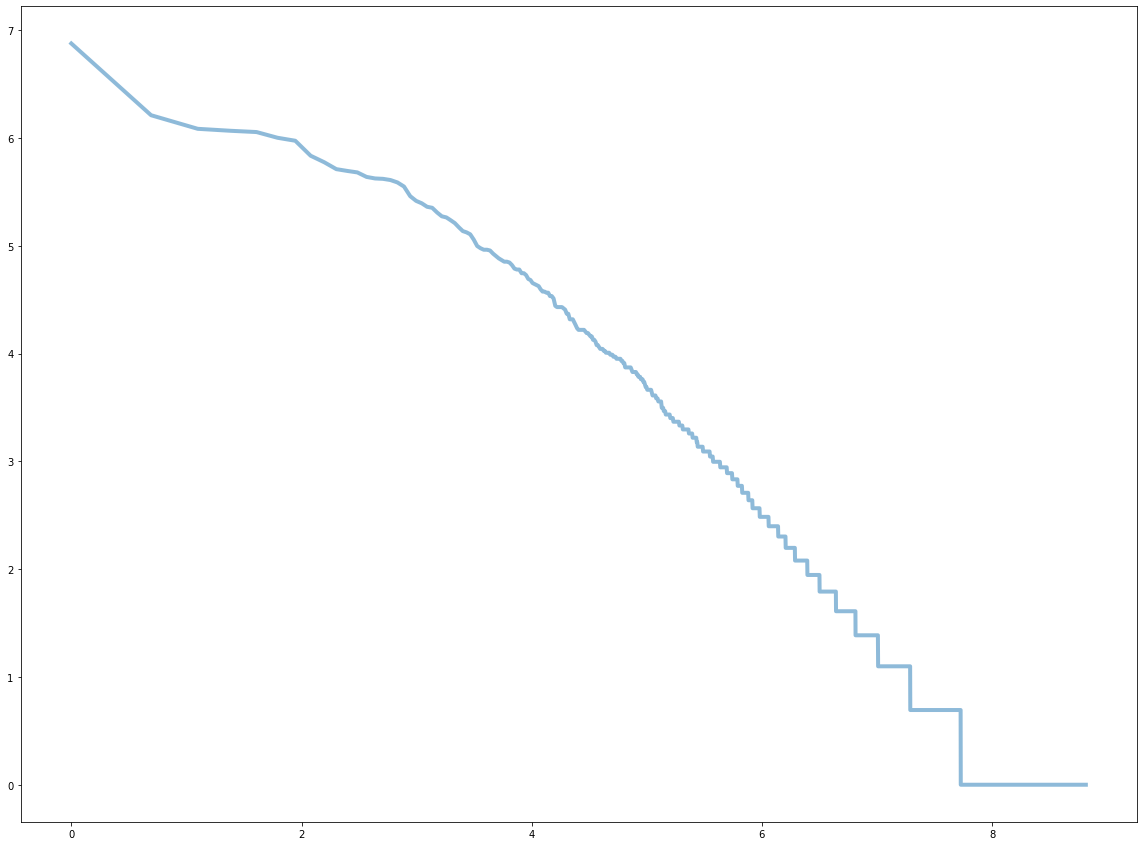

In [47]:
plt.rcParams["figure.figsize"] = [20, 15]
count = 0
for row in manuscript_df.iterrows():
    if count != 0:
        plt.plot(manuscript_df.loc[0,:], manuscript_df.loc[count,:], alpha=.5, linewidth='4')
    count = count + 1